In [8]:
%matplotlib inline
import os,sys
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, TSNE, LocallyLinearEmbedding, MDS, SpectralEmbedding
import scipy.stats as ss
import sklearn.metrics as sm
from scipy.cluster.hierarchy import inconsistent, linkage, dendrogram

sys.path.append('./')
from utils import *
from preprocess import *
from plotting import *
from cluster import *

# set some viz options
pd.options.display.max_columns=100
sns.set_style('whitegrid')

import vincent
vincent.core.initialize_notebook()
vincent.initialize_notebook()

from IPython.display import Image


<center> <img src="./FIGS/device.png" alt="Drawing"> <center>

<center> <h1> Precision Running Project </h1> </center>
<center> <h3> Ahmad Seif Kanaan PhD </h3> </center>


#  Data 
- Digital Sensing Device = iPhone7-2017-09 
- Running Data = Nike+RunClub 
- Health Data = Apple HealthKit

#  Features
- Nike+RunClub: Distance (km)
- Nike+RunClub: Average Speed(m/s) & Tempo (min/km)
- Nike+RunClub: Calories Burnt(kcal)
- AppleHealthKit: Mass (kg)
- AppleHealthKit: Walking+Running (km)
- AppleHealthKit: Elevation Gain (m)
- AppleHealthKit: Steps (count)

# Objectives
- Track Marathon training progress 
- Inspect improvement in total running distance and pace
- Inpsect relationship between RunDistance, RunSpeed, ElevationGain and time (month,week,day,hour) features 
- Inpsect relationship between Running and Health Features  
- Cluster days into different categoeries using feature data 
- Are the days broken down into 
    - sendetary,
    - short-distance-speed, 
    - long-distance,
    - long-distance-elevation ? 


# Pipeline:
- Parse Sensor XMLs
- Preprocess Nike+ and AppleHealthKit CSVs
- Map location to worlmap
- Inspect Total Running Distane with respect to time features
- Inspect Speed improvment over time
- Inspect Elevation Gain
- Inspect Mass
- Cluster Feature data for all-days and run-days only


# Parse Sensor Device xml files 

- Github Repository --> https://github.com/amadeuskanaan/PrecisionRunning/blob/master/extract.py
- For extraction functions see extract.py

# Import RAW CSVs and Preprocess Data 

In [15]:
# Import parsed data 
nike_run = pd.read_csv('Data/NikeRunClub.csv', index_col = 0)
apple_WalkRun = pd.read_csv('Data/DistanceWalkingRunning.csv')
apple_BodyMass = pd.read_csv('Data/BodyMass.csv')
apple_BodyFat = pd.read_csv('Data/BodyFatPercentage.csv')
apple_steps = pd.read_csv('Data/StepCount.csv')
apple_sleep = pd.read_csv('Data/SleepAnalysis.csv')
apple_climb = pd.read_csv('Data/FlightsClimbed.csv')

# Preprocessing -- > see preprocess.py
nike_run       = preproc_iphone_data(nike_run, 'Nike')
apple_walkrun  = preproc_iphone_data(apple_WalkRun, 'Apple')
apple_mass     = preproc_iphone_data(apple_BodyMass, 'Apple')
apple_elev     = preproc_iphone_data(apple_climb, 'Apple')
apple_steps    = preproc_iphone_data(apple_steps, 'Apple')

In [16]:
# Sum nike dataframe by Hour
nike_run_sum_hour = df_group_timefeature(nike_run, 'Time_of_day', 'sum')

# Sum nike df by weekday
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
nike_run_sum_week = df_group_timefeature(nike_run, 'Weekday', 'sum')
nike_run_sum_week = nike_run_sum_week.reindex(weekdays)

# Sum nike df by season
nike_run_sum_season = df_group_timefeature(nike_run, 'Season', 'sum')

# count nike df by weekday
nike_run_count_week = df_group_timefeature(nike_run, 'Weekday', 'count')
nike_run_count_week = nike_run_count_week.reindex(weekdays)

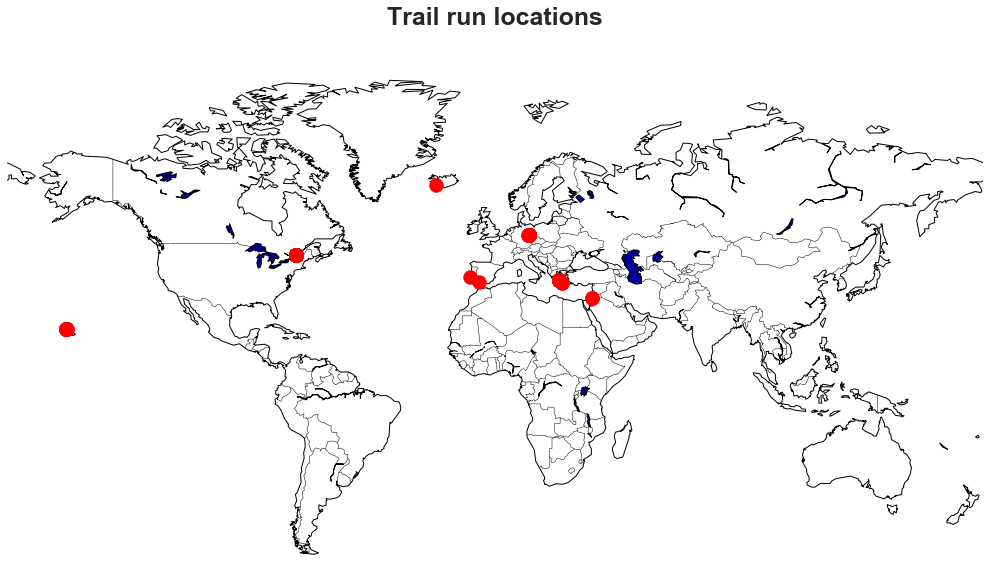

In [19]:
plt_world_map(nike_run, title = 'Trail run locations')

# Total Running Distance

In [20]:
# Sum nike dataframe by Month
nike_run_sum_month = df_group_timefeature(nike_run, 'Month', 'sum')

# Drop years before 2015
years = ['2015','2016','2017','2018']
nike_run_sum_month = nike_run_sum_month.drop([i for i in nike_run_sum_month.index if i[0:4] not in years])


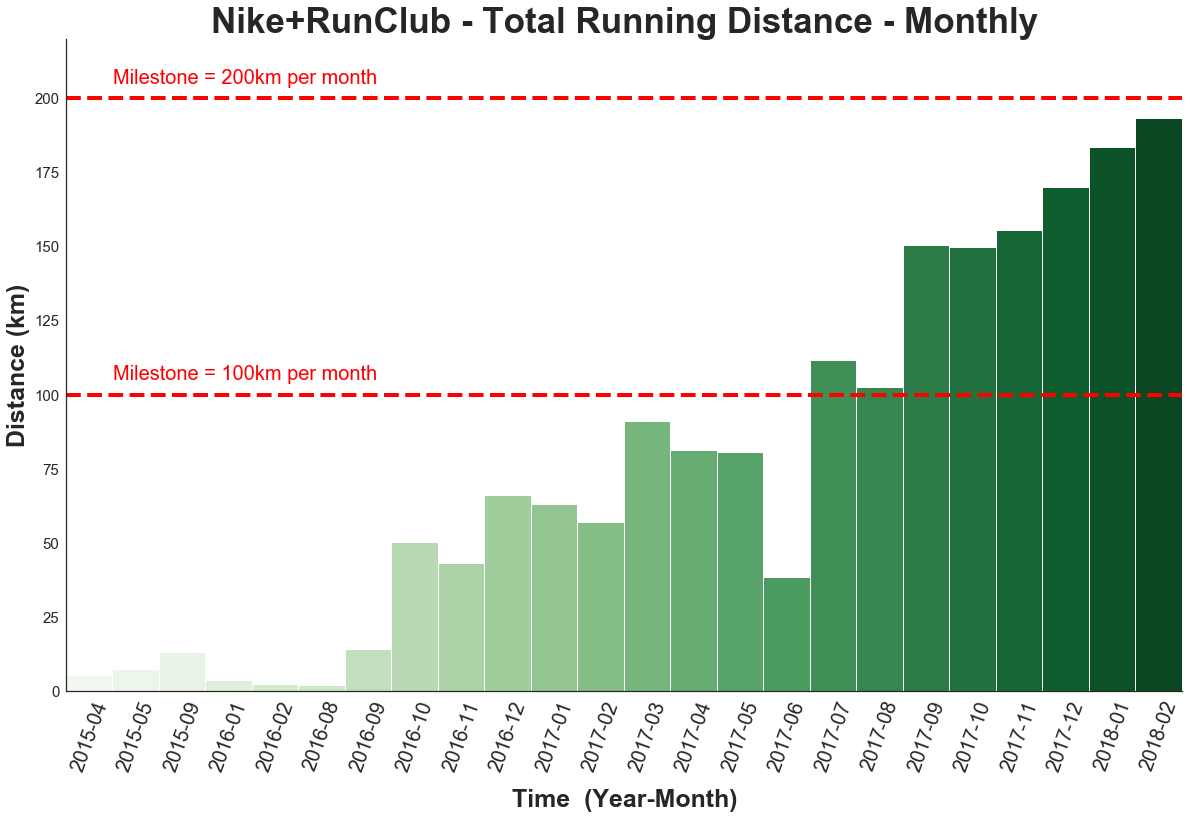

In [21]:
# Plot
fig, ax, g = plot_bar(df      =  nike_run_sum_month, feature = 'Distance', palette = 'Greens',
                      title   = 'Nike+RunClub - Total Running Distance - Monthly', 
                      xlabel  = 'Time  (Year-Month)', ylabel  = 'Distance (km)')
plt.ylim(0,220)
plt.axhline(100,color='r', linewidth=4, linestyle='--')
plt.axhline(200,color='r', linewidth=4, linestyle='--')
plt.annotate('Milestone = 200km per month', xy=(.5, 205), fontsize=20,color='red')
plt.annotate('Milestone = 100km per month', xy=(.5, 105), fontsize=20,color='red')